<h2> Análise dos Gastos com Alimentação nas Escolas Municipais de São Paulo </h2>
A alimentação escolar é importante para o desenvolvimento de crianças e jovens em todo o mundo, pois além de motivar muitos alunos a frequentar a escola, ela também apoia os pais que não possuem condições financeiras de fornecer alimentação. <br><br>
O <b> objetivo </b> deste notebook é explorar dados do Portal de Transparência disponibilizados pelo Tribunal de Contas do Estado de São Paulo, com gastos em diversos aos municipios aos que Campinas é região imediata, para os anos de 2019, 2020, 2021 e 2022. E buscar entender se houve alguma modificação entre a pré pandemia, pandemia e pós pandemia em relação aos gastos e seus fornecedores.

In [1]:
from funcoes import *

In [2]:
df = pd.read_csv('/home/natasha/Documentos/Pessoal/analise-alimentacao-escolar/src/notebooks/df_full_campinas.csv').drop(['index'],axis=1)

In [3]:
df.head(2)

,id_despesa_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
0,424887932,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,000900-2019,IDENTIFICACAO ESPECIAL - SEM CPF/CNPJ - 000000...,SERVIDORES MUNICIPAIS DE PAULINIA,31/01/2019,6473,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,OUTROS/NAO APLICAVEL,31901145 - FERIAS - ABONO CONSTITUCIONAL,"FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ..."
1,424888445,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,001095-2019,CNPJ - PESSOA JURIDICA - 29979036000140,INSTITUTO NACIONAL DO SEGURO SOCIAL.,31/01/2019,1625,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,OUTROS/NAO APLICAVEL,31901302 - CONTRIBUICOES PREVIDENCIARIAS - INSS,"FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ..."


O dataset para os anos respectivos e munícipios diretos a Campinas possui aproximadamente 60.636 registros.

In [4]:
df.shape

(60636, 23)

Arthur Nogueira e Campinas representam 30% de toda a base, será que em relação a gastos também? <br>
Com 17 municipios únicos, lembrando que Nova Odessa não houve nenhuma ocorrência para os filtros previamente feitos na etapa de tratamento de dados.

In [5]:
df.ds_municipio.value_counts(normalize=True)

ARTUR NOGUEIRA            0.168959
CAMPINAS                  0.133996
VINHEDO                   0.095405
AMERICANA                 0.077050
SANTA BARBARA D OESTE     0.072449
SANTO ANTONIO DE POSSE    0.071162
PEDREIRA                  0.070618
JAGUARIUNA                0.050564
HOLAMBRA                  0.050020
COSMOPOLIS                0.040141
MONTE MOR                 0.030394
VALINHOS                  0.030164
ELIAS FAUSTO              0.029784
PAULINIA                  0.028366
SUMARE                    0.021984
HORTOLANDIA               0.015832
INDAIATUBA                0.013111
Name: ds_municipio, dtype: float64

In [6]:
df.ds_municipio.nunique()

17

Podemos verificar que em 2020 é onde obtivemos menos registros relacionados a refeição, coincidentemente no ínicio da pandemia, informação a qual será melhor explorada adiante.

In [7]:
df.ano_exercicio.value_counts(normalize=True)

2022    0.373672
2019    0.283132
2021    0.215351
2020    0.127845
Name: ano_exercicio, dtype: float64

In [8]:
df.ds_subfuncao_governo.value_counts()

ALIMENTACAO E NUTRICAO    60636
Name: ds_subfuncao_governo, dtype: int64

In [9]:
df.ds_despesa.value_counts()

DISTRIBUIDORA NANCY LTDA                                 1987
MODOLOCAMPI AGRICOLA LTDA                                1517
NUTRIPLUS ALIMENTACAO E TECNOLOGIA LTDA                  1489
NUTRICIONALE COMERCIO DE ALIMENTOS LTDA                  1347
DALEFRUT COMERCIO DE PRODUTOS ALIMENTICIOS EIRELI EPP    1204
                                                         ... 
PREDILECTA ALIMENTOS LTDA                                   1
MATEUS VILANOVA TELLE 36276307858                           1
D  P  QUARTAROLO GERENCIAMENTO DE FROTAS EIRELI             1
INOVAR COMERCIO ONLINE DE METAIS E FERRAGENS EIREL          1
ANGELICA VIVIANE SIMPLICIO LOPEZ                            1
Name: ds_despesa, Length: 825, dtype: int64

In [10]:
df.ds_acao.value_counts()

MANUTENCAO DA MERENDA ESCOLAR                                         10919
MANUTENCAO DAS ATIVIDADES                                              9008
MANUTENCAO DOS SERVICOS                                                8092
PROMOVER E GARANTIR MERENDA ESCOLAR A TODAS AS UNIDADES ESCOLARES      4990
MANUTENCAO DA ASSISTENCIA AO EDUCANDO                                  4646
PROGRAMA MERENDA ESCOLAR                                               4239
ALIMENTACAO ESCOLAR                                                    3411
GESTAO DO PROGRAMA DE ALIMENTACAO ESCOLAR                              3066
*** NAO CONSTA NO CADASTRO ***                                         2712
DISTRIBUICAO DE MERENDA ESCOLAR NA REDE PUBLICA                        1843
MANUTENCAO DAS ATIVIDADES - MERENDA - TESOURO                          1237
GESTAO DE SERVICOS EDUCACIONAIS                                         976
FORNECIMENTO DE ALIMENTACAO ESCOLAR                                     795
MANUTENCAO D

<h3> Valor Gasto por Ano </h3>
Houve um pequeno aumento do valor total com gastos relacionados a alimentação, entre 2019 e 2021, o gasto foi em média 900 bilhões, já em 2022 foi o ano em que houve mais gastos no total com 1.345.905.471 (trilhão). Será que abertura de escolas ou mudanças nos cardápios, estrutura da alimentação? (pesquisar)

In [11]:
df.groupby('ano_exercicio').agg({'vl_despesa': ['mean', 'median', 'sum', 'max', 'min']}).apply(lambda s: s.apply('{0:.2f}'.format)).reset_index()

ano_exercicio vl_despesa                                                  
                      mean   median            sum          max          min
0          2019   48109.89  4567.50   825950652.00  19250000.00  -1307361.00
1          2020  124545.85  7669.00   965479448.00  25500000.00  -7255097.00
2          2021   67954.47  3969.00   887349405.00  28000000.00    -56001.00
3          2022   59400.89  5492.50  1345905471.00  20000000.00   -141388.00

<function matplotlib.pyplot.show(close=None, block=None)>

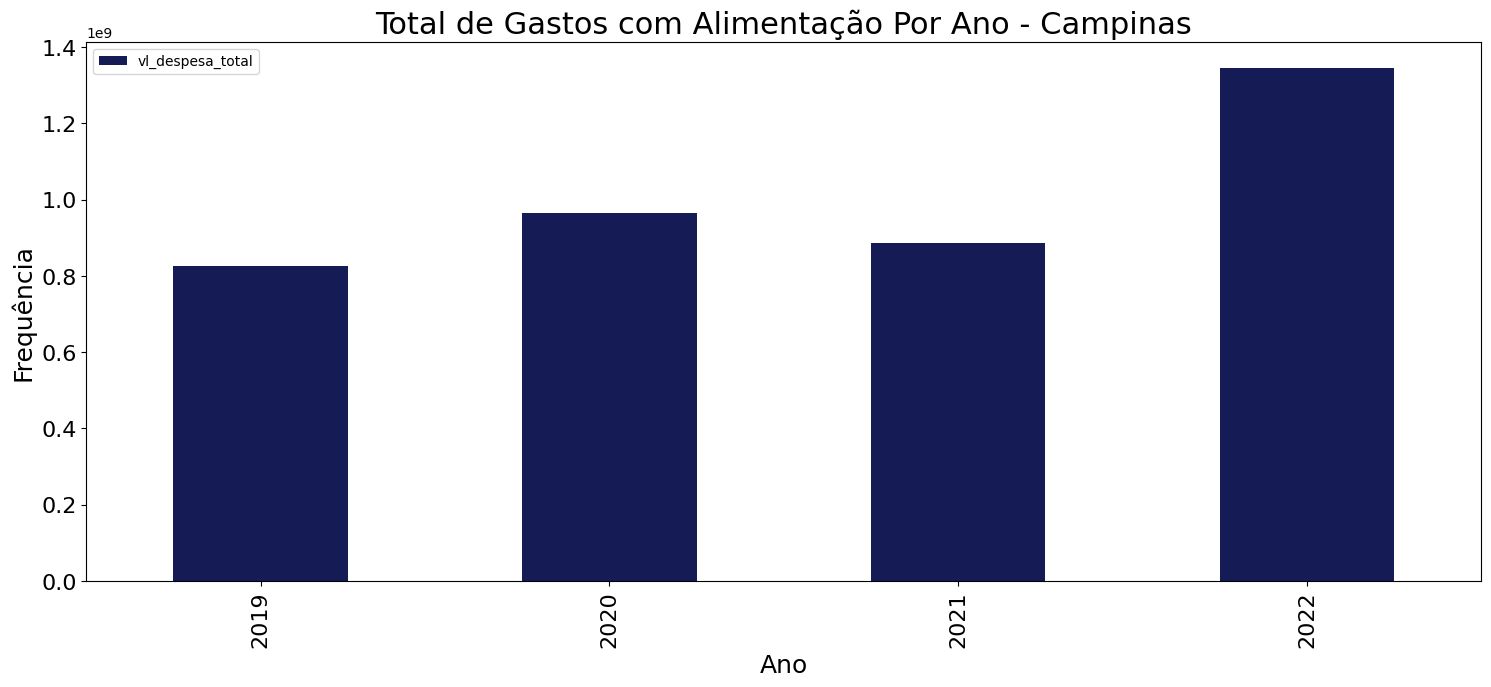

In [12]:
df_soma = df.groupby('ano_exercicio').agg({'vl_despesa': 'sum'}).apply(lambda s: s.apply('{0:.2f}'.format)).reset_index()
df_soma.rename(columns={'vl_despesa': 'vl_despesa_total'}, inplace = True)
df_soma['vl_despesa_total'] = df_soma['vl_despesa_total'].astype(float)

plot_bar(df_soma, 'ano_exercicio', 'vl_despesa_total', 'Total de Gastos com Alimentação Por Ano - Campinas', 'Ano')

Os gastos conforme os anos possuem uma distribuição muito parecida, exceto pelo ano de 2020 que aparentemente houve maior ocorrência de valores negativos.

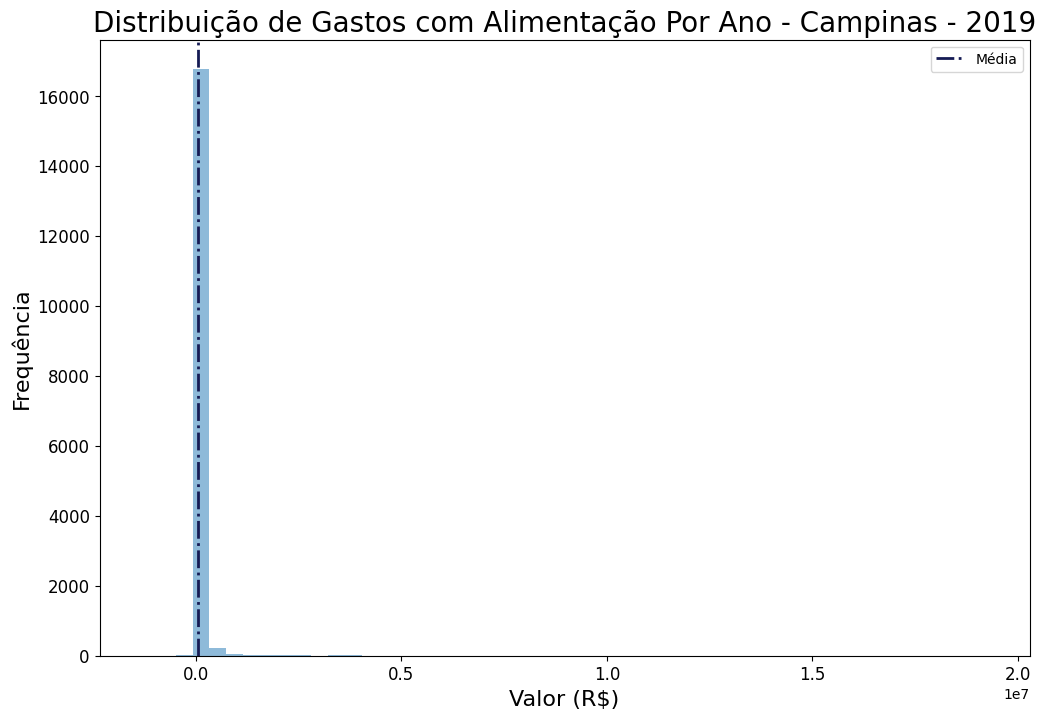

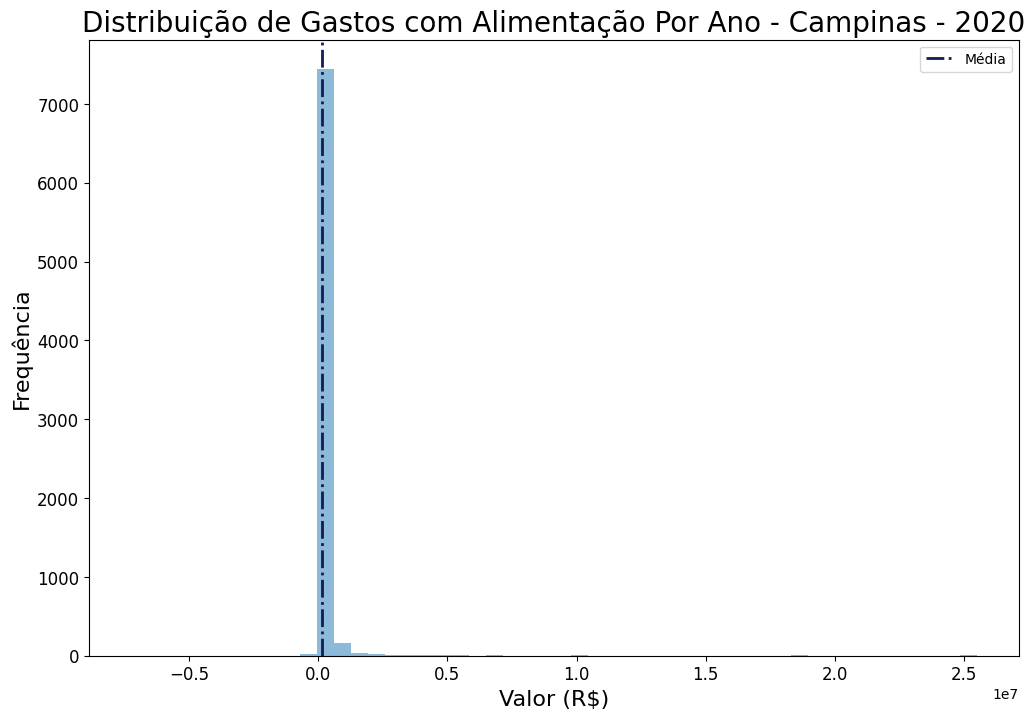

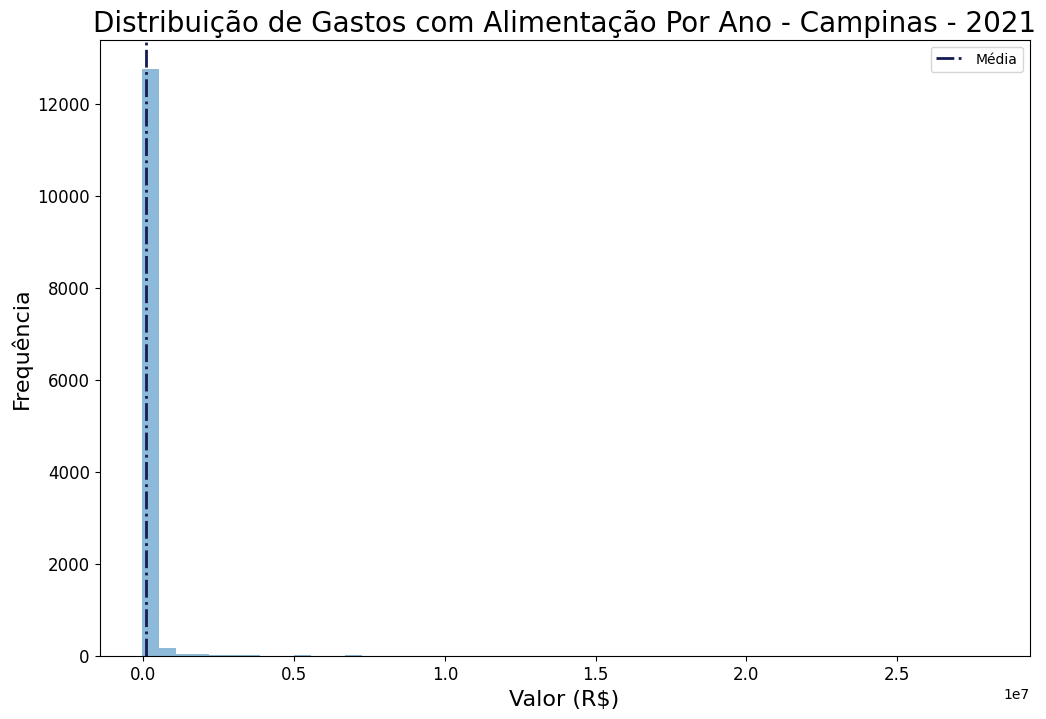

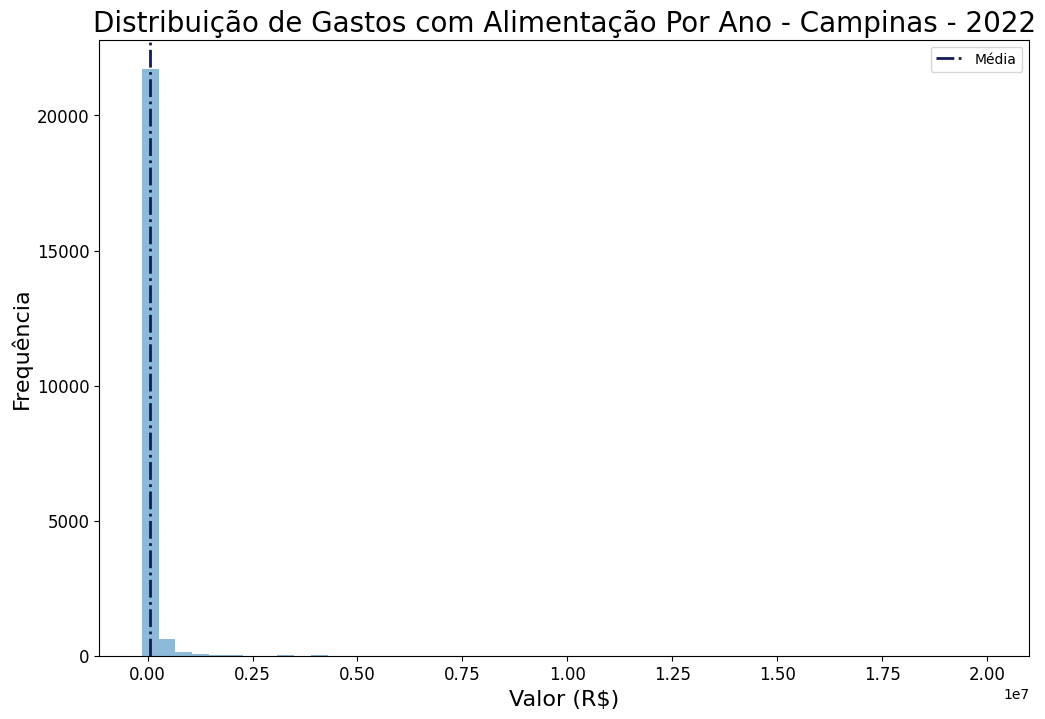

In [13]:
ano = [2019, 2020, 2021, 2022]

for i in ano:
    df_temp = df.loc[df.ano_exercicio==i,:]
    if len(df_temp) == 0:
        continue
    plot_hist(df_temp, 'vl_despesa', 'vl_despesa', f'Distribuição de Gastos com Alimentação Por Ano - Campinas - {i}', 'Valor (R$)')

<h3> Gastos por Municipio </h3>
A distribuição de gastos é bem parecida no decorrer dos anos para os munícipios, como se x percentual do orçamento fosse direcionado aquele munícipio, também pode ter relação com a quantidade de habitantes e o tamanho do municipio, como por exemplo, Campinas representa aproximadamente 50% de todo o valor gasto, provavelmente por ser o maior munícipio dentre todos, inclusive a região imediata.

In [14]:
df_soma_mun = df.groupby(['ds_municipio', 'ano_exercicio']).agg({'vl_despesa': 'sum'}).apply(lambda s: s.apply('{0:.2f}'.format)).reset_index()
df_soma_mun.rename(columns={'vl_despesa': 'vl_despesa_total'}, inplace = True)
df_soma_mun['vl_despesa_total'] = df_soma_mun['vl_despesa_total'].astype(float)

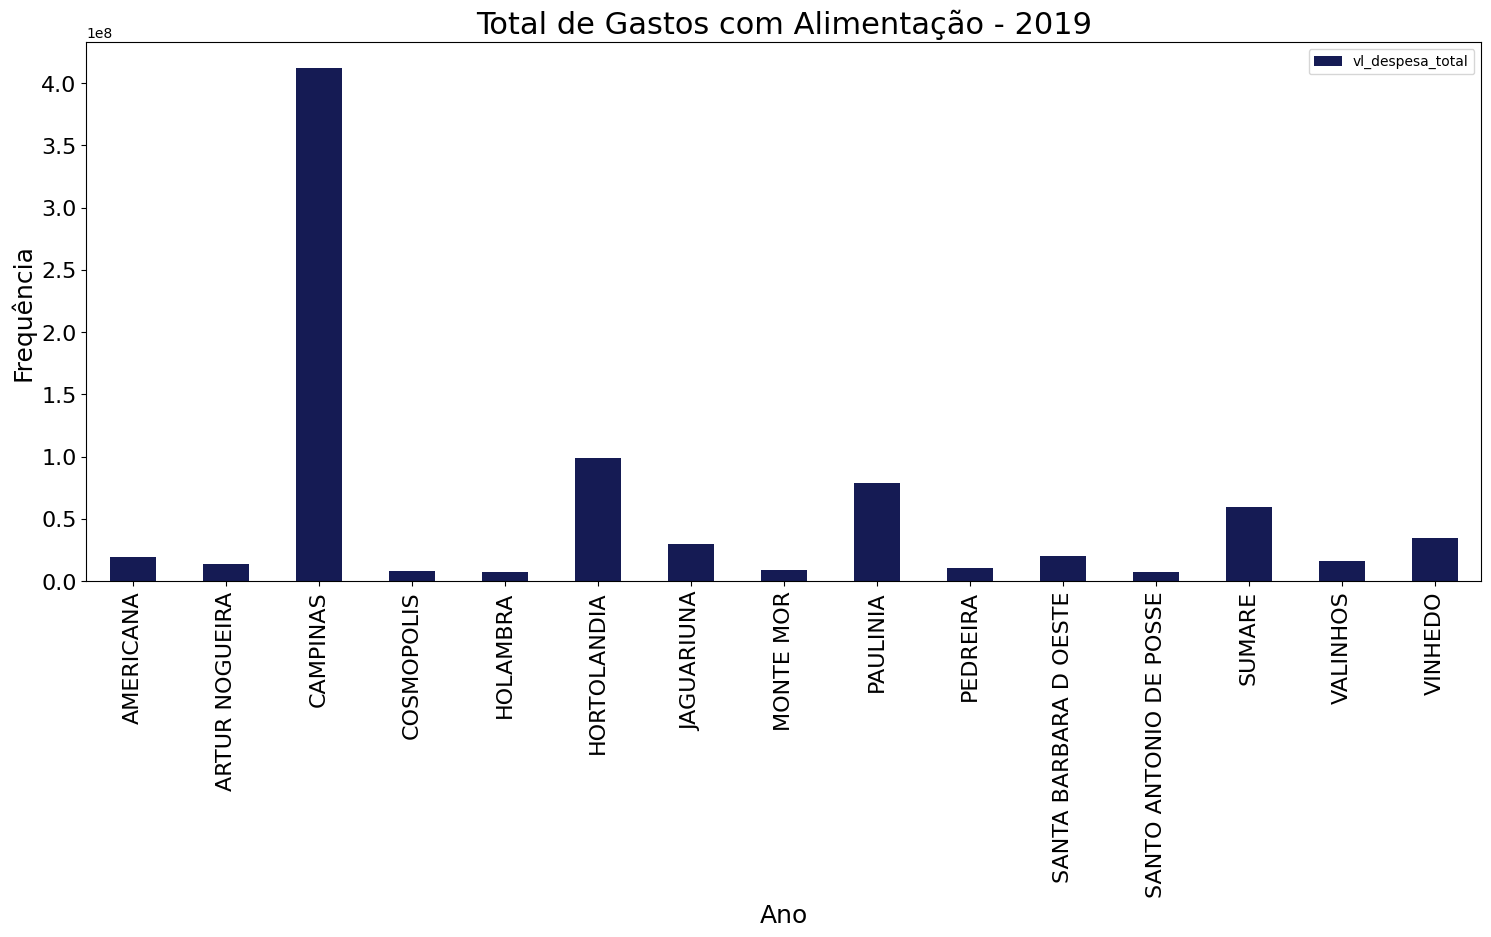

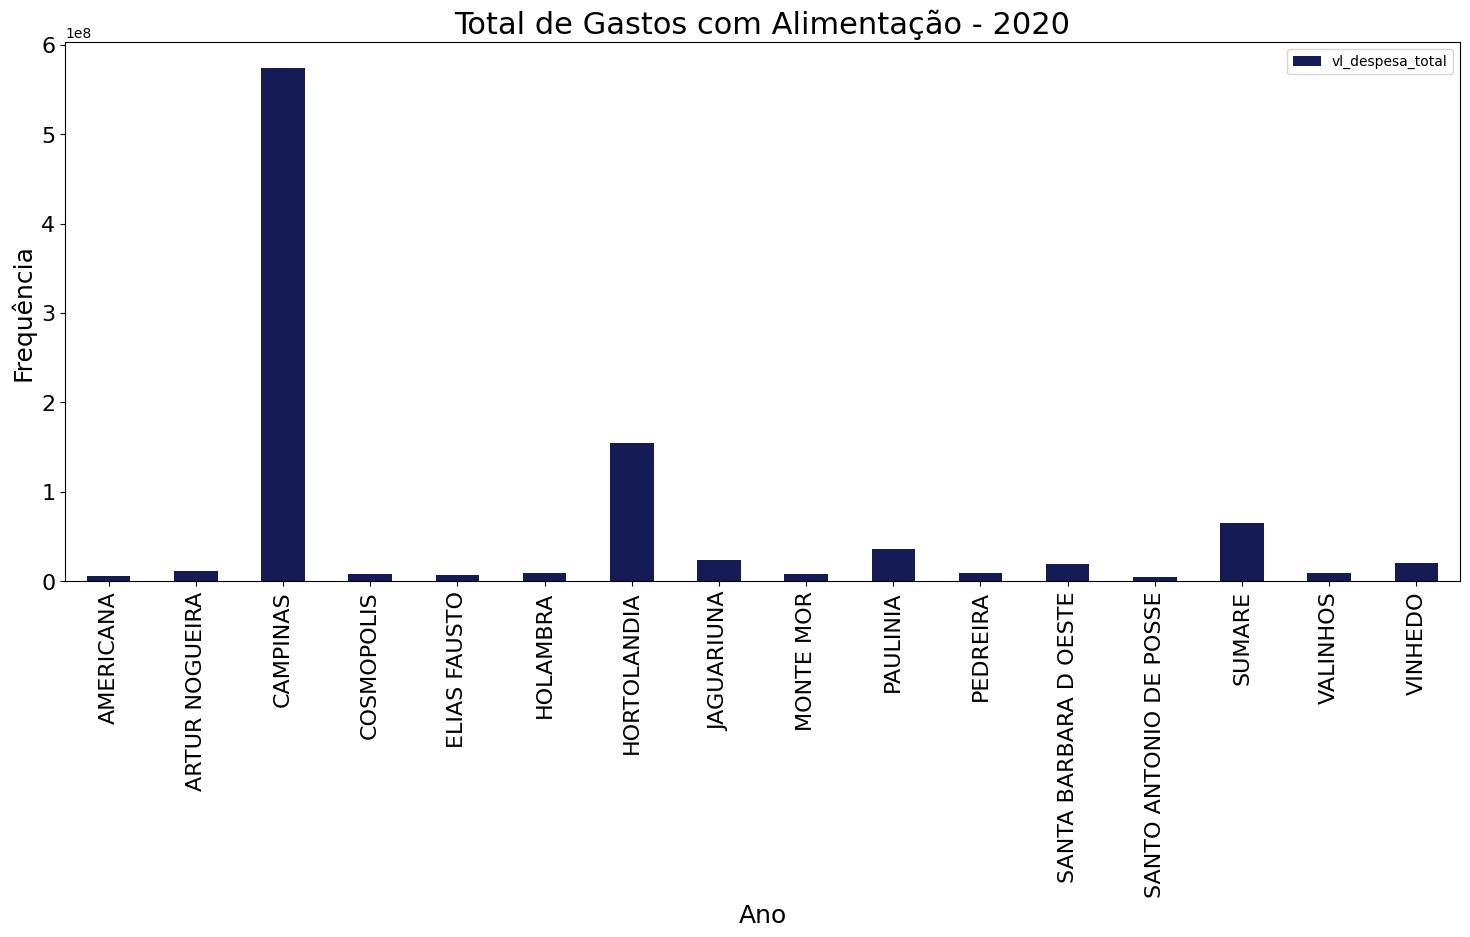

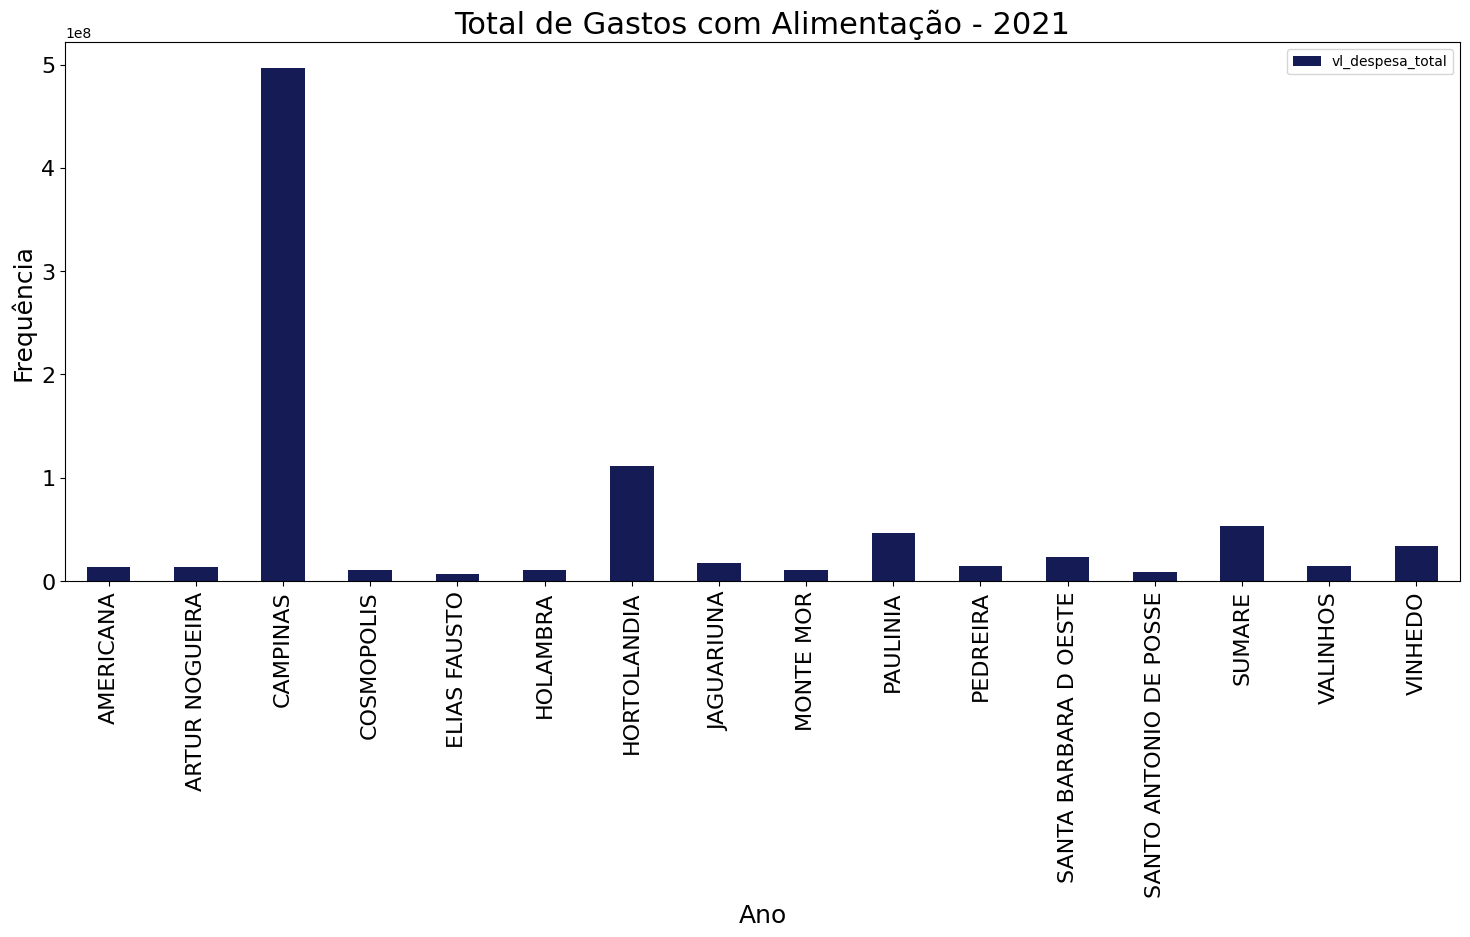

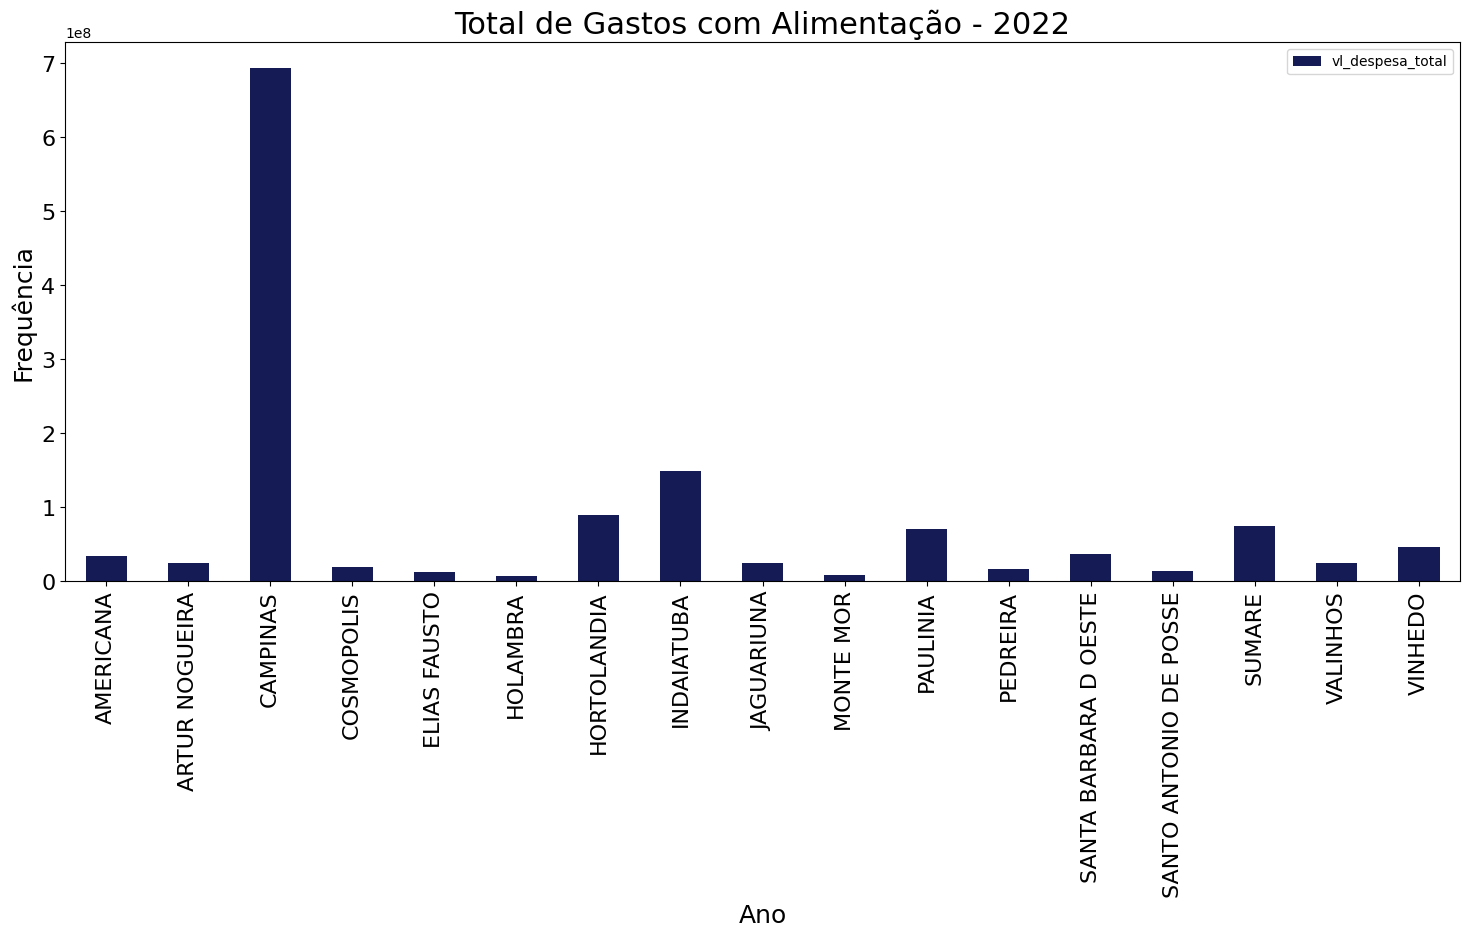

In [15]:
ano = [2019, 2020, 2021, 2022]

for y in ano:
    df_temp_mun = df_soma_mun.loc[df_soma_mun.ano_exercicio==y,:]
    if len(df_temp_mun) == 0:
        continue
    plot_bar(df_temp_mun, 'ds_municipio', 'vl_despesa_total', f'Total de Gastos com Alimentação - {y}', 'Ano')

<h3> Quantidade de Transações por Ano </h3>

2020 foi o ano com menos transações únicas de despesas feitas relacionadas a alimentação escolar, com aproximadamente -54% de despesas referente ao ano de 2019, o que é curioso, pois os gastos totais obtiveram um leve crescimento. Em 2021 esse valor quase dobrou, lembrando que ainda estávamos em cenário pandêmico. <br>
Todas as transações possuem id de identificação único.

<function matplotlib.pyplot.show(close=None, block=None)>

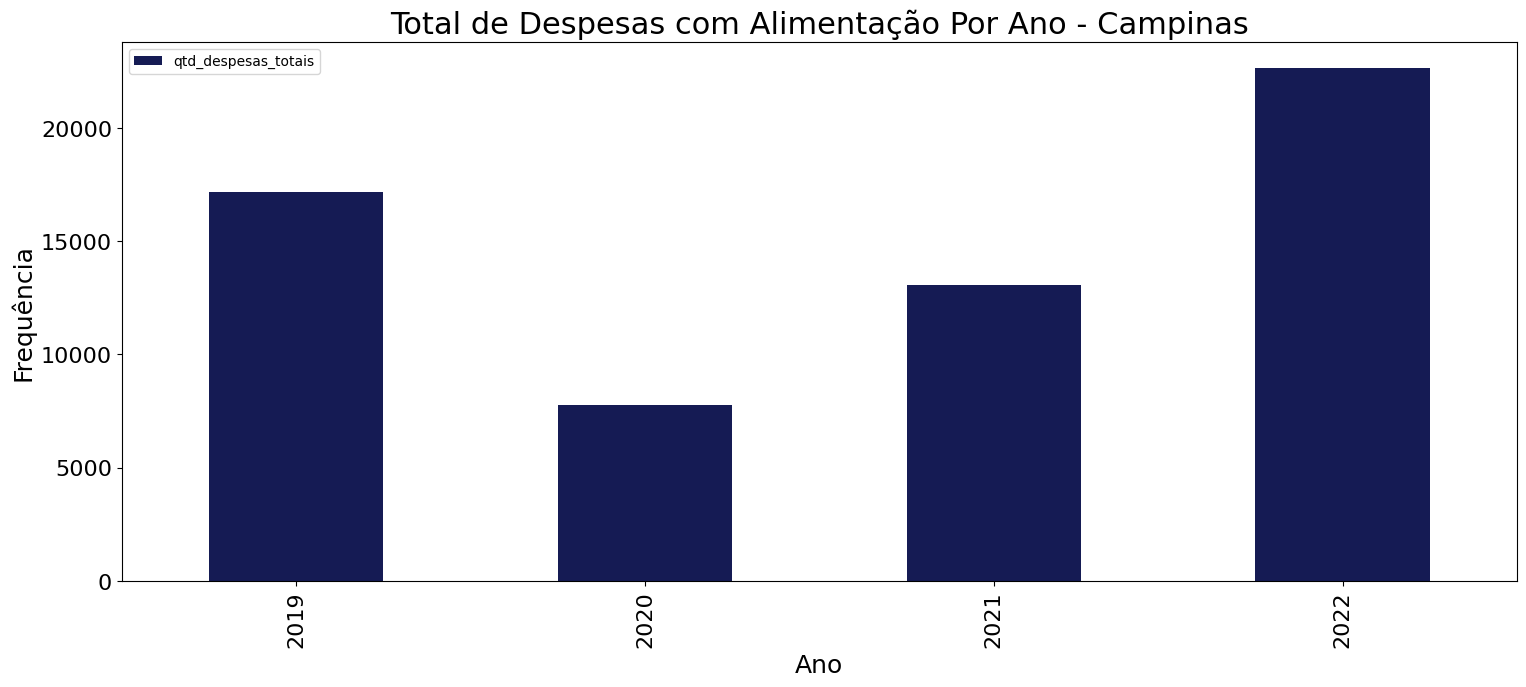

In [16]:
df_transacao = df.groupby('ano_exercicio').agg({'id_despesa_detalhe': 'count'}).apply(lambda s: s.apply('{0:.2f}'.format)).reset_index()
df_transacao.rename(columns={'id_despesa_detalhe': 'qtd_despesas_totais'}, inplace = True)
df_transacao['qtd_despesas_totais'] = df_transacao['qtd_despesas_totais'].astype(float)

plot_bar(df_transacao, 'ano_exercicio', 'qtd_despesas_totais', 'Total de Despesas com Alimentação Por Ano - Campinas', 'Ano')

In [17]:
df.id_despesa_detalhe.nunique()

60636

In [18]:
df.shape

(60636, 23)

In [19]:
df.head()

,id_despesa_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
0,424887932,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,000900-2019,IDENTIFICACAO ESPECIAL - SEM CPF/CNPJ - 000000...,SERVIDORES MUNICIPAIS DE PAULINIA,31/01/2019,6473,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,OUTROS/NAO APLICAVEL,31901145 - FERIAS - ABONO CONSTITUCIONAL,"FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ..."
1,424888445,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,001095-2019,CNPJ - PESSOA JURIDICA - 29979036000140,INSTITUTO NACIONAL DO SEGURO SOCIAL.,31/01/2019,1625,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,OUTROS/NAO APLICAVEL,31901302 - CONTRIBUICOES PREVIDENCIARIAS - INSS,"FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ..."
2,424888911,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,000520-2019,CNPJ - PESSOA JURIDICA - 09445502000109,SOLUCOES SERVICOS TERCEIRIZADOS - EIRELI,17/01/2019,17540879,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,BEC-BOLSA ELETRONICA DE COMPRAS,33903941 - FORNECIMENTO DE ALIMENTACAO,CONTRATACAO DE EMPRESA ESPECIALIZADA NA PRESTA...
3,424889312,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,001066-2019,CNPJ - PESSOA JURIDICA - 00360305000104,CAIXA ECONOMICA FEDERAL,31/01/2019,584,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,OUTROS/NAO APLICAVEL,31901301 - FGTS,"FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ..."
4,424889781,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,000331-2019,CNPJ - PESSOA JURIDICA - 12047604000172,RUANA COMERCIAL LTDA,10/01/2019,3558,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,BEC-BOLSA ELETRONICA DE COMPRAS,33903022 - MATERIAL DE LIMPEZA E PRODUTOS DE H...,ESPONJA DUPLA FACE MULTIUSO COMPOSTA DE ESPUMA...


<h3> Descrição Programa - TOP 10 </h3>
Conforme esperado merenda escolar é programq que possui maior incidência nos gastos, mas os outros programas possuem alguma relação indireta/direta com alimentação?

<function matplotlib.pyplot.show(close=None, block=None)>

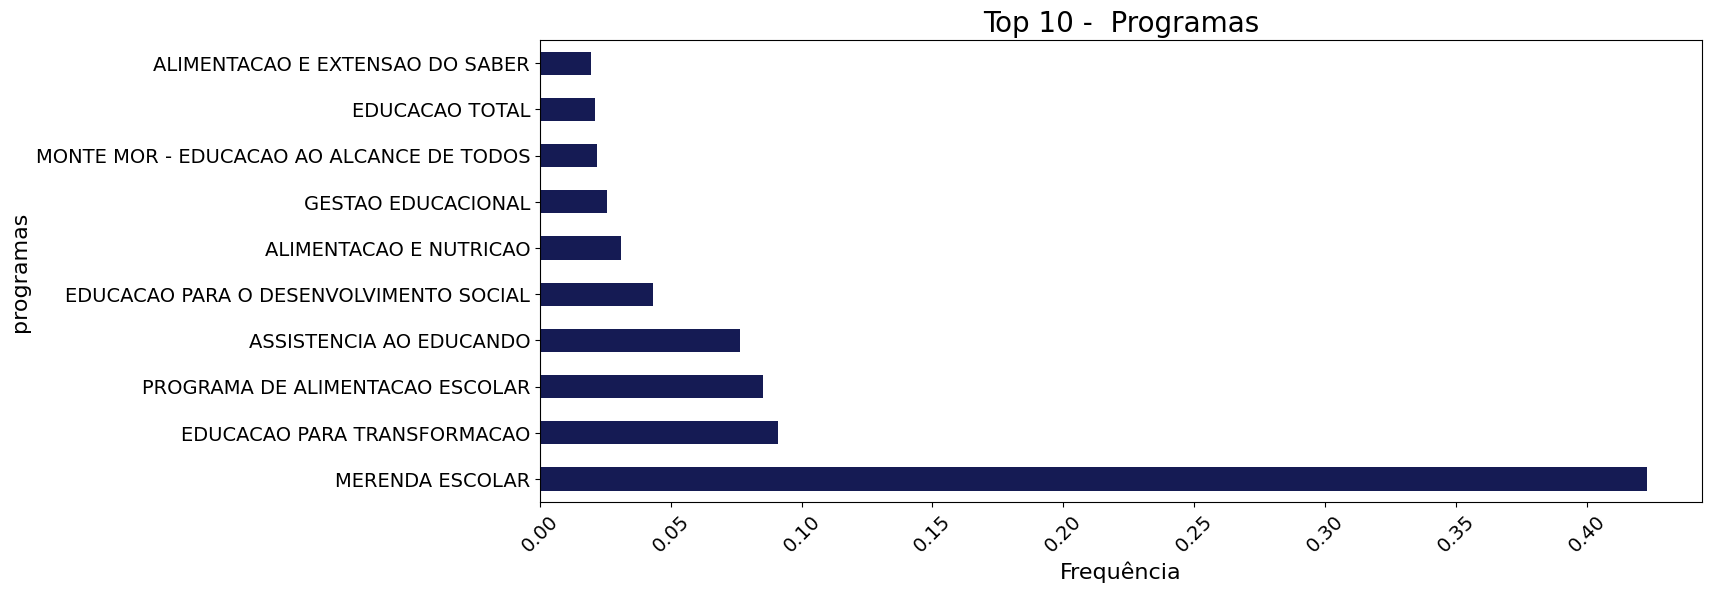

In [20]:
plot_bar_h(df, 'ds_programa', 'Top 10 -  Programas', 'programas')

<h3> Fonte Recurso </h3>

<function matplotlib.pyplot.show(close=None, block=None)>

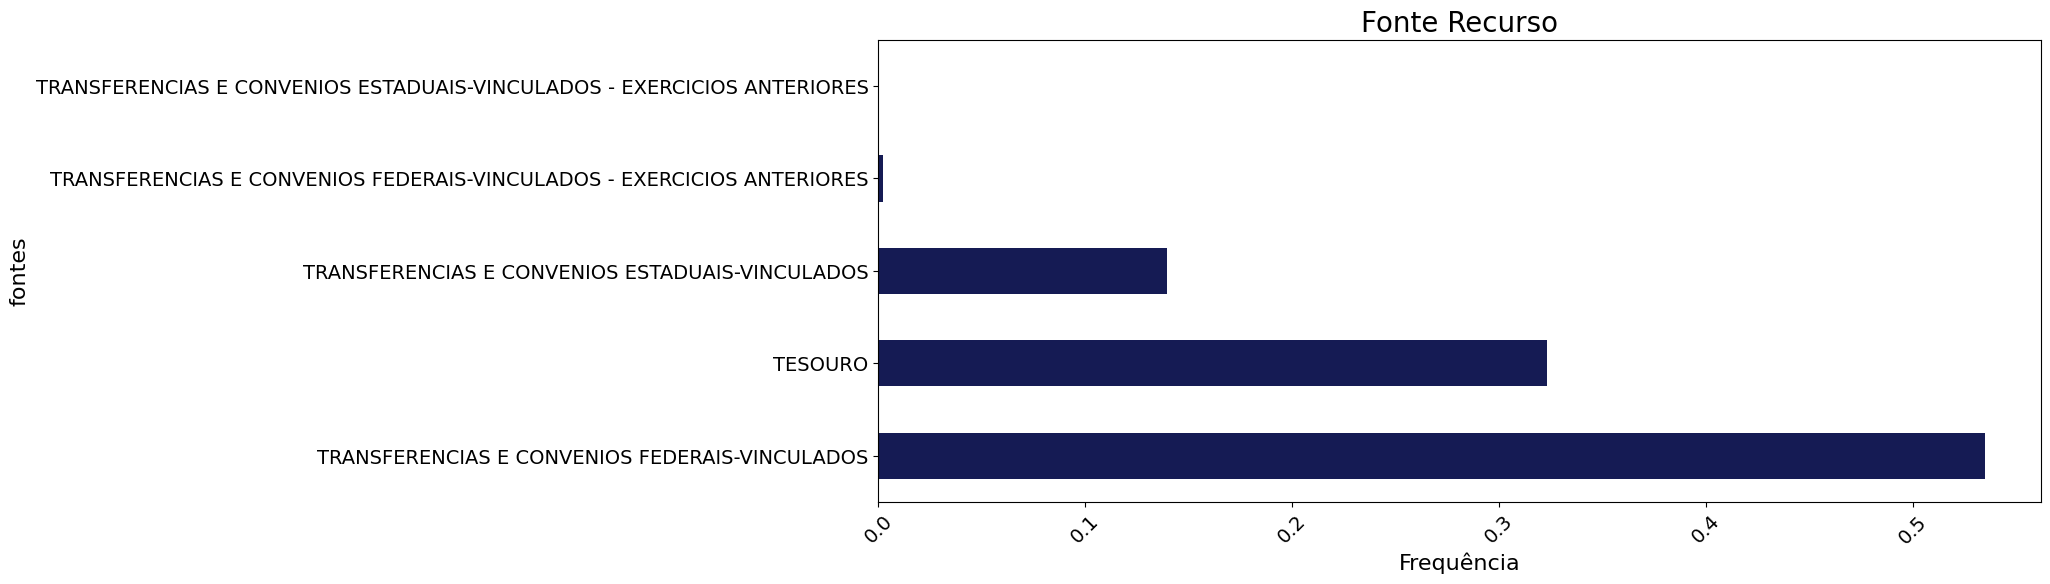

In [21]:
plot_bar_h(df, 'ds_fonte_recurso', 'Fonte Recurso', 'fontes')

<h3> Função Governo </h3>

In [22]:
df.ds_funcao_governo.value_counts()

EDUCACAO                 58630
SAUDE                     1980
DIREITOS DA CIDADANIA       26
Name: ds_funcao_governo, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

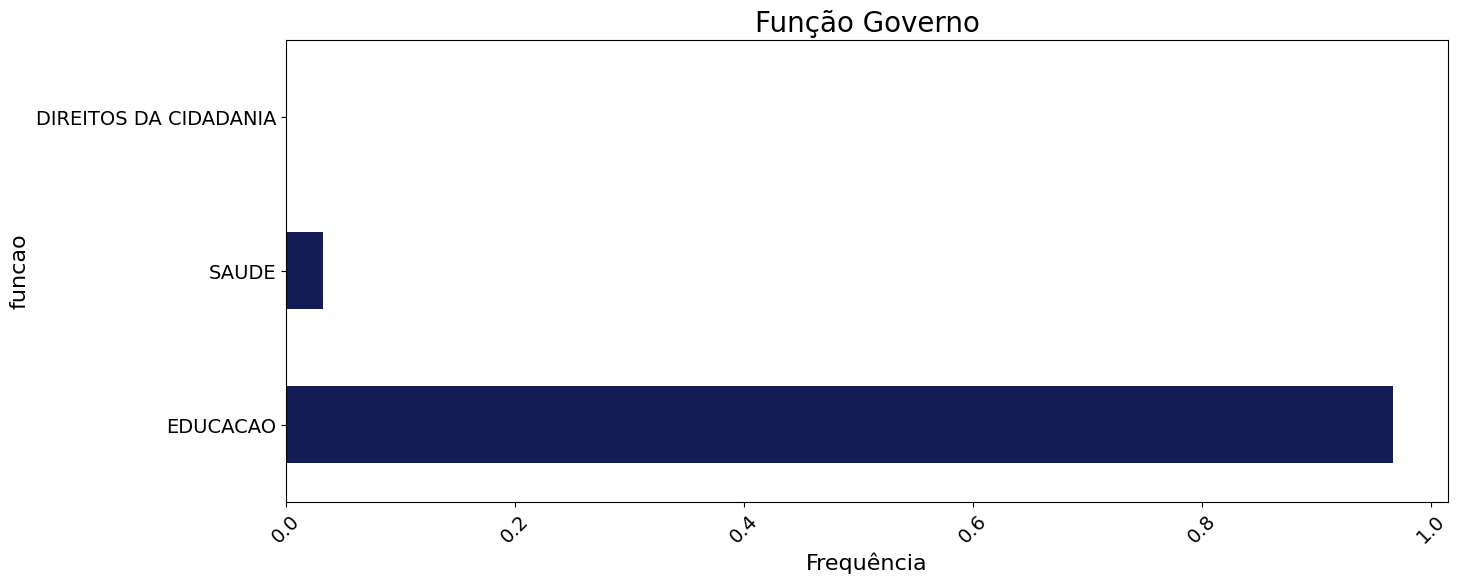

In [23]:
plot_bar_h(df, 'ds_funcao_governo', 'Função Governo', 'funcao')

<h3> Subfunção Governo </h3>

In [24]:
df.ds_subfuncao_governo.value_counts()

ALIMENTACAO E NUTRICAO    60636
Name: ds_subfuncao_governo, dtype: int64

<h3> Top 10 - Ação </h3>
Dentre as 35 possibilidades de ações, as 10 primeiras mais incidentes possuem uma relação com merenda escolar, seja manutenção ou distribuição de alimentos.

In [25]:
len(df.ds_acao.value_counts())

35

<function matplotlib.pyplot.show(close=None, block=None)>

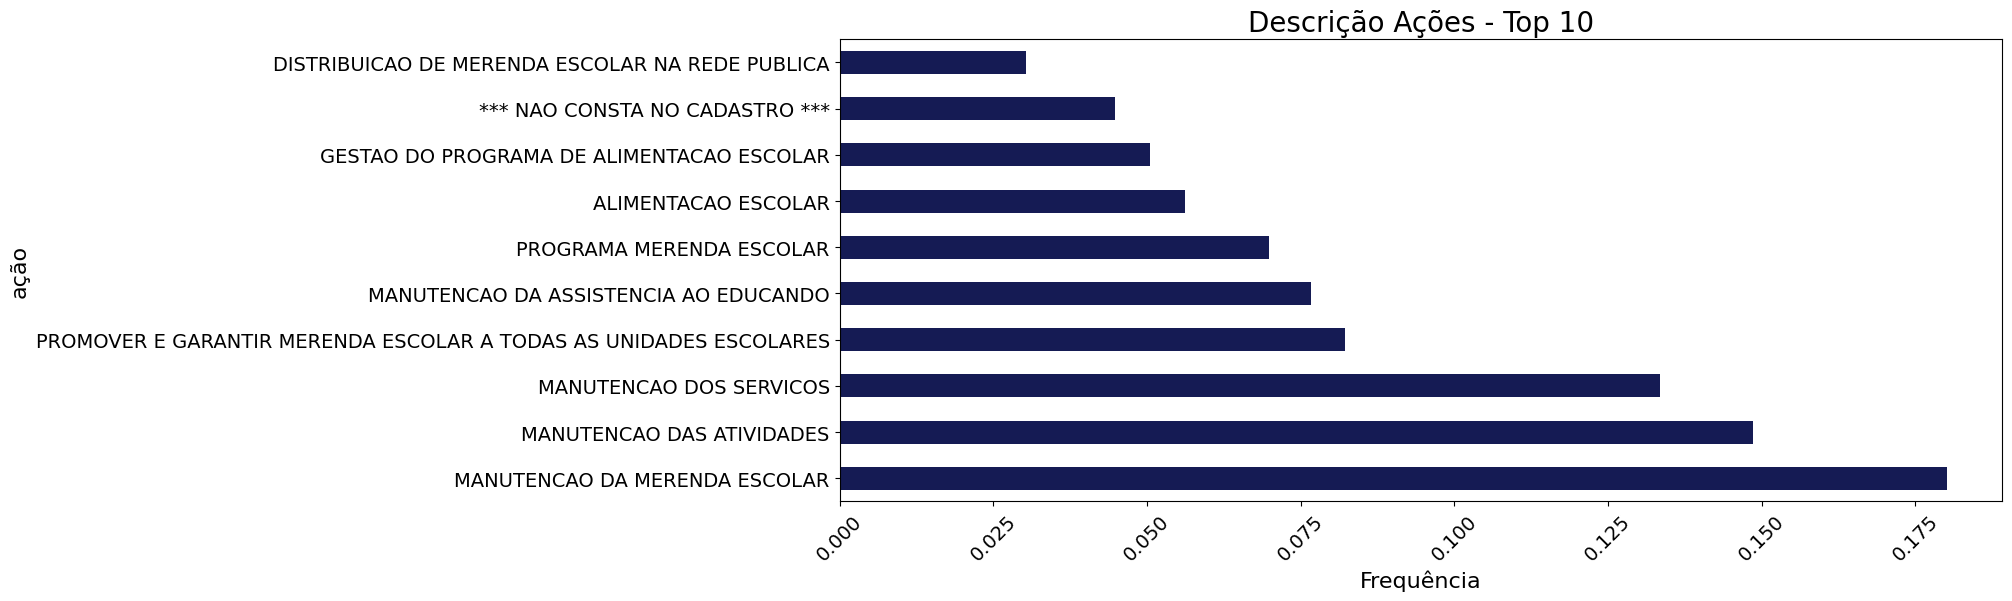

In [26]:
plot_bar_h(df, 'ds_acao', 'Descrição Ações - Top 10', 'ação')

<h3> Modalidade Lic </h3>

In [27]:
df.ds_modalidade_lic.value_counts()

PREGAO                             35860
BEC-BOLSA ELETRONICA DE COMPRAS     9476
OUTROS/NAO APLICAVEL                7303
DISPENSA DE LICITACAO               5517
CONCORRENCIA                        1600
INEXIGIVEL                           865
CONVITE                               15
Name: ds_modalidade_lic, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

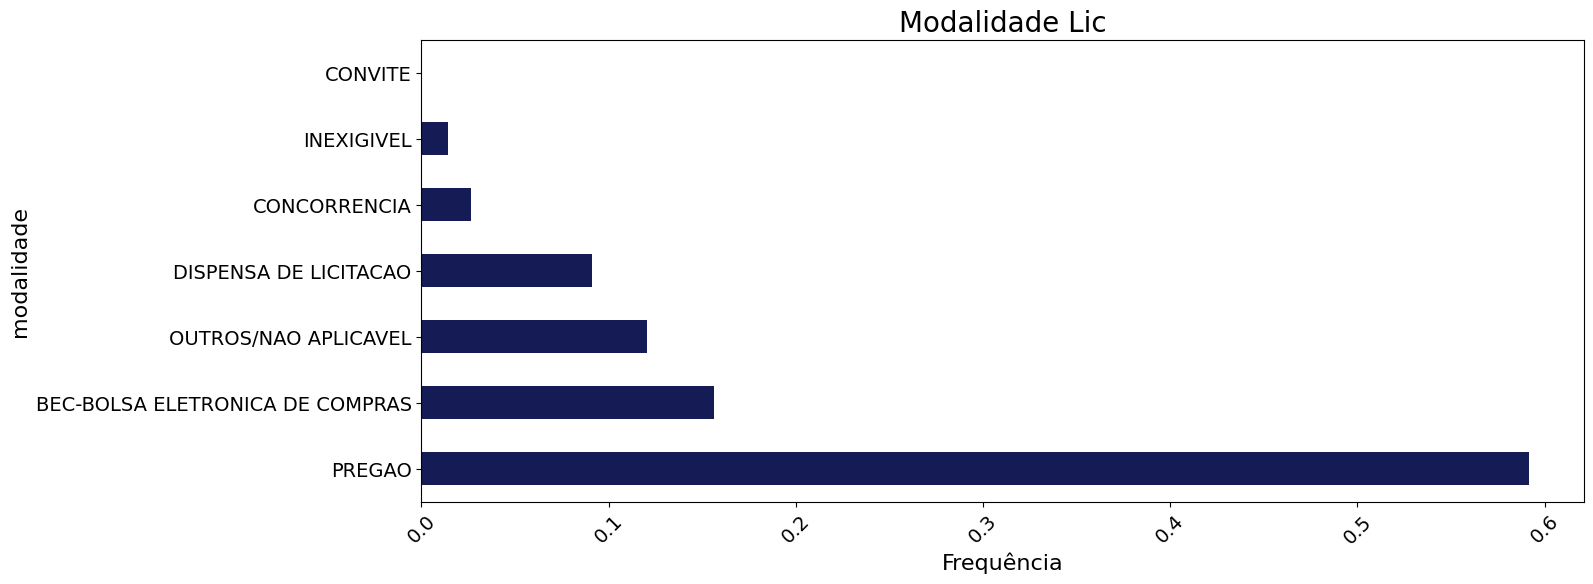

In [28]:
plot_bar_h(df, 'ds_modalidade_lic', 'Modalidade Lic', 'modalidade')

<h3> Elemento </h3>
O Elemento parece ser a categoria da despesa, o que faz sentido mais de 80% serem destinados a generos de alimentação. E os outros gastos podem ser de funcionários que trabalham nas escolas, por exemplo. Ao total são 101 elementos únicos.

In [29]:
len(df.ds_elemento.value_counts())

101

In [30]:
df.ds_elemento.nunique()

101

<function matplotlib.pyplot.show(close=None, block=None)>

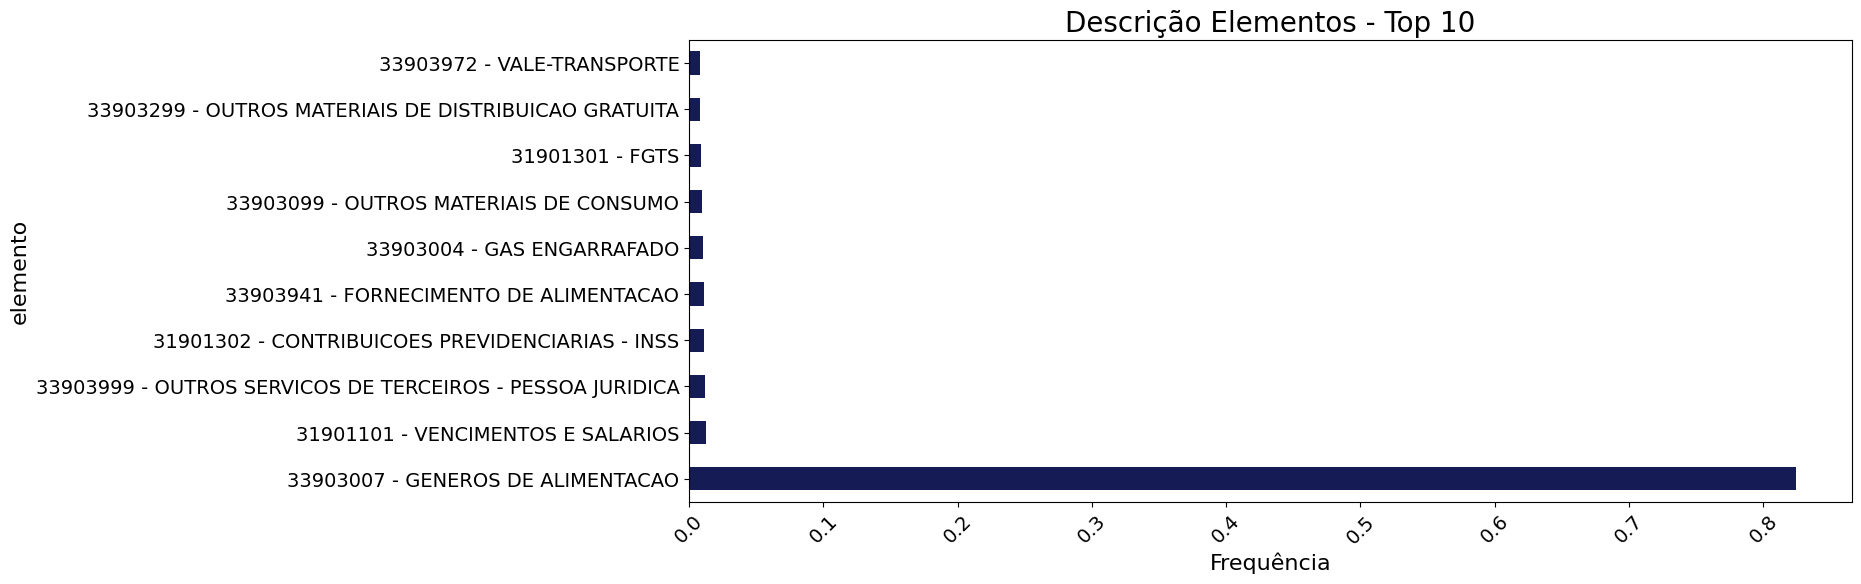

In [31]:
plot_bar_h(df, 'ds_elemento', 'Descrição Elementos - Top 10', 'elemento')

<h3> Histórico Despesa </h3>
Muito curioso metade dos dados serem nulos, essa coluna parece algo mais detalhado sobre a despesa, como por exemplo a abaixo:CONTRATO N 20/2019 AQUISICAO DE PRODUTOS DE HORTIFRUTIGRANJEIROS PARA AS REFEICOES DOS ALUNOS INTEGRADOS AO PROGRAMA MERENDA ESCOLAR (CRECHES).

In [32]:
df['historico_despesa'][15220]

'CONTRATO N 20/2019 AQUISICAO DE PRODUTOS DE HORTIFRUTIGRANJEIROS PARA AS REFEICOES DOS ALUNOS INTEGRADOS AO PROGRAMA MERENDA ESCOLAR (CRECHES)'

In [33]:
#reduzindo a quantidade de caracteres para criar a visualização
df['historico_despesa_'] = df['historico_despesa'].str[:80]


In [34]:
df.historico_despesa.value_counts()

NAN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   24

In [35]:
len(df.historico_despesa.value_counts())

6267

<function matplotlib.pyplot.show(close=None, block=None)>

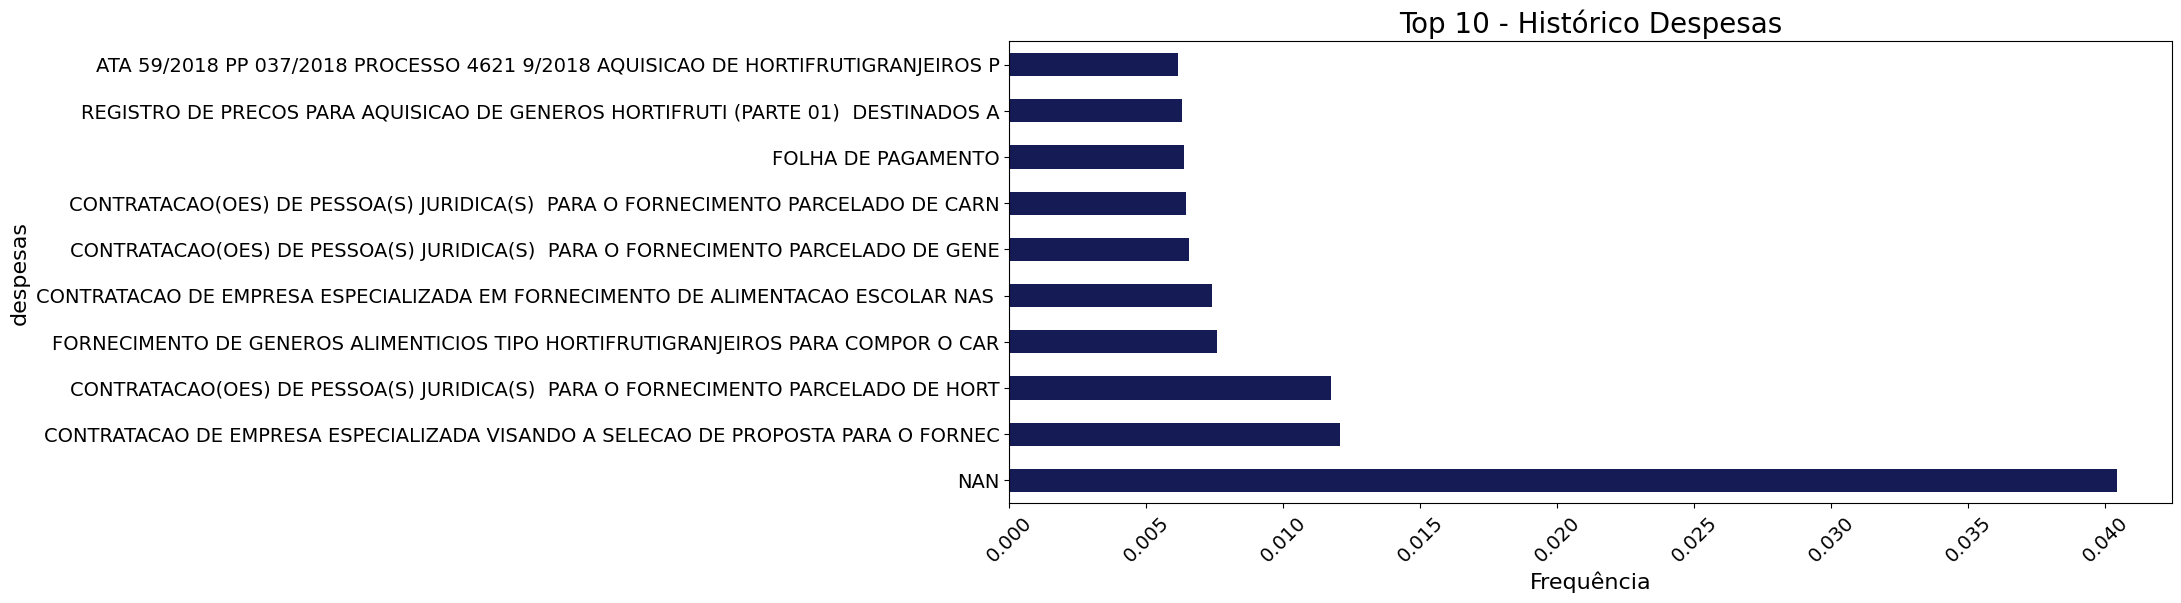

In [36]:
plot_bar_h(df, 'historico_despesa_', 'Top 10 - Histórico Despesas', 'despesas')

<h3> Orgão </h3>
O órgão é a prefeitura do municipio em questão.

In [37]:
df.ds_orgao.value_counts()

PREFEITURA MUNICIPAL DE ARTUR NOGUEIRA            10245
PREFEITURA MUNICIPAL DE CAMPINAS                   8125
PREFEITURA MUNICIPAL DE VINHEDO                    5785
PREFEITURA MUNICIPAL DE AMERICANA                  4672
PREFEITURA MUNICIPAL DE SANTA BARBARA D OESTE      4393
PREFEITURA MUNICIPAL DE SANTO ANTONIO DE POSSE     4315
PREFEITURA MUNICIPAL DE PEDREIRA                   4282
PREFEITURA MUNICIPAL DE JAGUARIUNA                 3066
PREFEITURA MUNICIPAL DE HOLAMBRA                   3033
PREFEITURA MUNICIPAL DE COSMOPOLIS                 2434
PREFEITURA MUNICIPAL DE MONTE MOR                  1843
PREFEITURA MUNICIPAL DE VALINHOS                   1829
PREFEITURA MUNICIPAL DE ELIAS FAUSTO               1806
PREFEITURA MUNICIPAL DE PAULINIA                   1720
PREFEITURA MUNICIPAL DE SUMARE                     1333
PREFEITURA MUNICIPAL DE HORTOLANDIA                 960
PREFEITURA MUNICIPAL DE INDAIATUBA                  795
Name: ds_orgao, dtype: int64

In [38]:
len(df.ds_orgao.value_counts())

17

<function matplotlib.pyplot.show(close=None, block=None)>

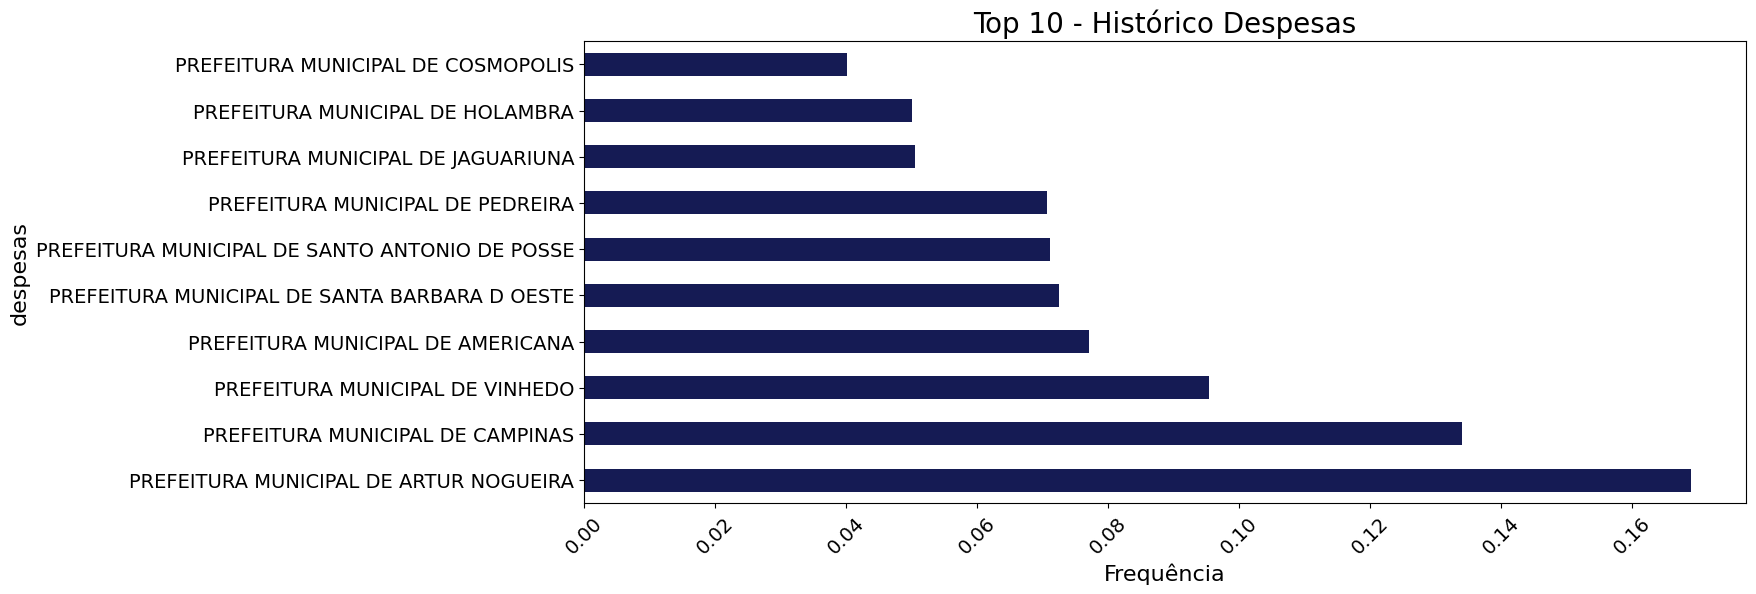

In [39]:
plot_bar_h(df, 'ds_orgao', 'Top 10 - Histórico Despesas', 'despesas')

<h3> Idenficador Despesa </h3>
São 613 fornecedores (?) distintos, sendo bem distribuídos, o mais frequente ocorre em apenas 5% da base de dados, sendo uma <a href="https://casadosdados.com.br/solucao/cnpj/wandc-alimentos-eireli-10362443000186">empresa de alimentos</a> como esperado.

In [40]:
df.identificador_despesa.value_counts(normalize=True)

CNPJ - PESSOA JURIDICA - 10362443000186    0.051059
CNPJ - PESSOA JURIDICA - 74555541000112    0.034682
CNPJ - PESSOA JURIDICA - 00024415000103    0.032769
CNPJ - PESSOA JURIDICA - 21026898000147    0.024655
CNPJ - PESSOA JURIDICA - 49254634000160    0.024556
                                             ...   
CNPJ - PESSOA JURIDICA - 62546387000133    0.000016
CNPJ - PESSOA JURIDICA - 27250354000140    0.000016
CNPJ - PESSOA JURIDICA - 14144192000114    0.000016
CNPJ - PESSOA JURIDICA - 14045831000194    0.000016
CNPJ - PESSOA JURIDICA - 23100120000166    0.000016
Name: identificador_despesa, Length: 613, dtype: float64

É muito variado os gastos com uma dispersão bem evidente, com fornecedores com gastos elevados e outros nem tanto, como por exemplo o : CNPJ - PESSOA JURIDICA - 00000000106429 que possui 10 reais como gasto, e quando vamos investigar podemos verificar que foi um gasto referente a taxas bancárias. Mas teríamos um CNPJ apenas para isso? E ao pesquisar, verifiquei que a empresa em questão é o <a href="https://casadosdados.com.br/solucao/cnpj/banco-do-brasil-sa-00000000106429">banco do Brasil</a>

In [41]:
df[df['identificador_despesa'] == 'CNPJ - PESSOA JURIDICA - 00000000106429']

,id_despesa_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa,historico_despesa_
8204,461236973,2019,SUMARE,PREFEITURA MUNICIPAL DE SUMARE,12,DEZEMBRO,EMPENHADO,11873-2019,CNPJ - PESSOA JURIDICA - 00000000106429,BANCO DO BRASIL SA,31/12/2019,10,EDUCACAO,ALIMENTACAO E NUTRICAO,1,FORTALECIMENTO DA EDUCACAO BASICA MUNICIPAL,2003,MERENDA ESCOLAR,TRANSFERENCIAS E CONVENIOS ESTADUAIS-VINCULADOS,0200 - EDUCACAO - RECURSOS ESPECIFICOS,OUTROS/NAO APLICAVEL,33903099 - OUTROS MATERIAIS DE CONSUMO,TARIFA BANCARIA - 18/12/2019 ...,TARIFA BANCARIA - 18/12/2019 ...
8217,461244021,2019,SUMARE,PREFEITURA MUNICIPAL DE SUMARE,12,DEZEMBRO,VALOR PAGO,11873-2019,CNPJ - PESSOA JURIDICA - 00000000106429,BANCO DO BRASIL SA,31/12/2019,10,EDUCACAO,ALIMENTACAO E NUTRICAO,1,FORTALECIMENTO DA EDUCACAO BASICA MUNICIPAL,2003,MERENDA ESCOLAR,TRANSFERENCIAS E CONVENIOS ESTADUAIS-VINCULADOS,0200 - EDUCACAO - RECURSOS ESPECIFICOS,OUTROS/NAO APLICAVEL,33903099 - OUTROS MATERIAIS DE CONSUMO,TARIFA BANCARIA - 18/12/2019 ...,TARIFA BANCARIA - 18/12/2019 ...
8233,461249055,2019,SUMARE,PREFEITURA MUNICIPAL DE SUMARE,12,DEZEMBRO,VALOR LIQUIDADO,11873-2019,CNPJ - PESSOA JURIDICA - 00000000106429,BANCO DO BRASIL SA,31/12/2019,10,EDUCACAO,ALIMENTACAO E NUTRICAO,1,FORTALECIMENTO DA EDUCACAO BASICA MUNICIPAL,2003,MERENDA ESCOLAR,TRANSFERENCIAS E CONVENIOS ESTADUAIS-VINCULADOS,0200 - EDUCACAO - RECURSOS ESPECIFICOS,OUTROS/NAO APLICAVEL,33903099 - OUTROS MATERIAIS DE CONSUMO,TARIFA BANCARIA - 18/12/2019 ...,TARIFA BANCARIA - 18/12/2019 ...


In [42]:
df_identificador = df.groupby('identificador_despesa').agg({'vl_despesa': ['mean', 'median', 'sum', 'max', 'min']}).apply(lambda s: s.apply('{0:.2f}'.format))
df_identificador

vl_despesa                        \
                                              mean   median          sum   
identificador_despesa                                                      
CNPJ - PESSOA JURIDICA - 00000000031909     193.00   193.00       579.00   
CNPJ - PESSOA JURIDICA - 00000000106429      10.00    10.00        30.00   
CNPJ - PESSOA JURIDICA - 00024415000103   13881.85  6422.00  27583229.00   
CNPJ - PESSOA JURIDICA - 00028822000180   10554.60  4121.00    612167.00   
CNPJ - PESSOA JURIDICA - 00029865000180    6413.81  1418.00   1718901.00   
...                                            ...      ...          ...   
PESSOA FISICA - 875468                     9169.00  9169.00     27507.00   
PESSOA FISICA - 989309                     6850.82  4312.00    685082.00   
PESSOA FISICA - 993608                     5390.81  2067.50    258759.00   
PESSOA FISICA - 999498                     1333.33  4000.00      8000.00   
PESSOA FISICA - 999978                     3720.92  1096.00     44651.00   

                                                               
                                               max        min  
identificador_despesa                                          
CNPJ - PESSOA JURIDICA - 00000000031909     193.00     193.00  
CNPJ - PESSOA JURIDICA - 00000000106429      10.00      10.00  
CNPJ - PESSOA JURIDICA - 00024415000103  328301.00  -11404.00  
CNPJ - PESSOA JURIDICA - 00028822000180   65561.00    1010.00  
CNPJ - PESSOA JURIDICA - 00029865000180  146158.00      17.00  
...                                            ...        ...  
PESSOA FISICA - 875468                     9169.00    9169.00  
PESSOA FISICA - 989309                    60000.00     191.00  
PESSOA FISICA - 993608                    20948.00       0.00  
PESSOA FISICA - 999498                     4000.00   -4000.00  
PESSOA FISICA - 999978                    19586.00    1096.00  

[613 rows x 5 columns]

In [43]:
df.head()

,id_despesa_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa,historico_despesa_
0,424887932,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,000900-2019,IDENTIFICACAO ESPECIAL - SEM CPF/CNPJ - 000000...,SERVIDORES MUNICIPAIS DE PAULINIA,31/01/2019,6473,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,OUTROS/NAO APLICAVEL,31901145 - FERIAS - ABONO CONSTITUCIONAL,"FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ...","FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ..."
1,424888445,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,001095-2019,CNPJ - PESSOA JURIDICA - 29979036000140,INSTITUTO NACIONAL DO SEGURO SOCIAL.,31/01/2019,1625,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,OUTROS/NAO APLICAVEL,31901302 - CONTRIBUICOES PREVIDENCIARIAS - INSS,"FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ...","FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ..."
2,424888911,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,000520-2019,CNPJ - PESSOA JURIDICA - 09445502000109,SOLUCOES SERVICOS TERCEIRIZADOS - EIRELI,17/01/2019,17540879,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,BEC-BOLSA ELETRONICA DE COMPRAS,33903941 - FORNECIMENTO DE ALIMENTACAO,CONTRATACAO DE EMPRESA ESPECIALIZADA NA PRESTA...,CONTRATACAO DE EMPRESA ESPECIALIZADA NA PRESTA...
3,424889312,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,001066-2019,CNPJ - PESSOA JURIDICA - 00360305000104,CAIXA ECONOMICA FEDERAL,31/01/2019,584,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,OUTROS/NAO APLICAVEL,31901301 - FGTS,"FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ...","FOLHA DE PAGAMENTO, REFERENTE A JANEIRO/2019. ..."
4,424889781,2019,PAULINIA,PREFEITURA MUNICIPAL DE PAULINIA,1,JANEIRO,EMPENHADO,000331-2019,CNPJ - PESSOA JURIDICA - 12047604000172,RUANA COMERCIAL LTDA,10/01/2019,3558,EDUCACAO,ALIMENTACAO E NUTRICAO,9,EDUCACAO TOTAL,2015,MANUTENCAO DA MERENDA ESCOLAR,TESOURO,0110 - GERAL,BEC-BOLSA ELETRONICA DE COMPRAS,33903022 - MATERIAL DE LIMPEZA E PRODUTOS DE H...,ESPONJA DUPLA FACE MULTIUSO COMPOSTA DE ESPUMA...,ESPONJA DUPLA FACE MULTIUSO COMPOSTA DE ESPUMA...


<h3> Matriz de Correlação </h3>
O coeficiente de Pearson, é uma das formas de medir o grau de correlação através do cálculo de direção positiva ou negativa. <br>
- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;<br>
- ρ = 0,7 a 09 (positivo ou negativo): correlação forte;<br>
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;<br>
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;<br>
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.<br>

<br>

Como podemos verificar abaixo não possuímos muitos variáveis quantitativas, em sua maioria são qualitativas, e as poucas numéricas as quais possuímos não possuem correlação. Exceto pelo id_despesa_detalhe e ano_exercicio, o que faz sentido, já que os ids são valores únicos distribuídos em diferentes anos.

In [44]:
correlation = df.corr()

/tmp/ipykernel_26075/3853220190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Text(0.5, 1.0, 'Matriz de Correlação')

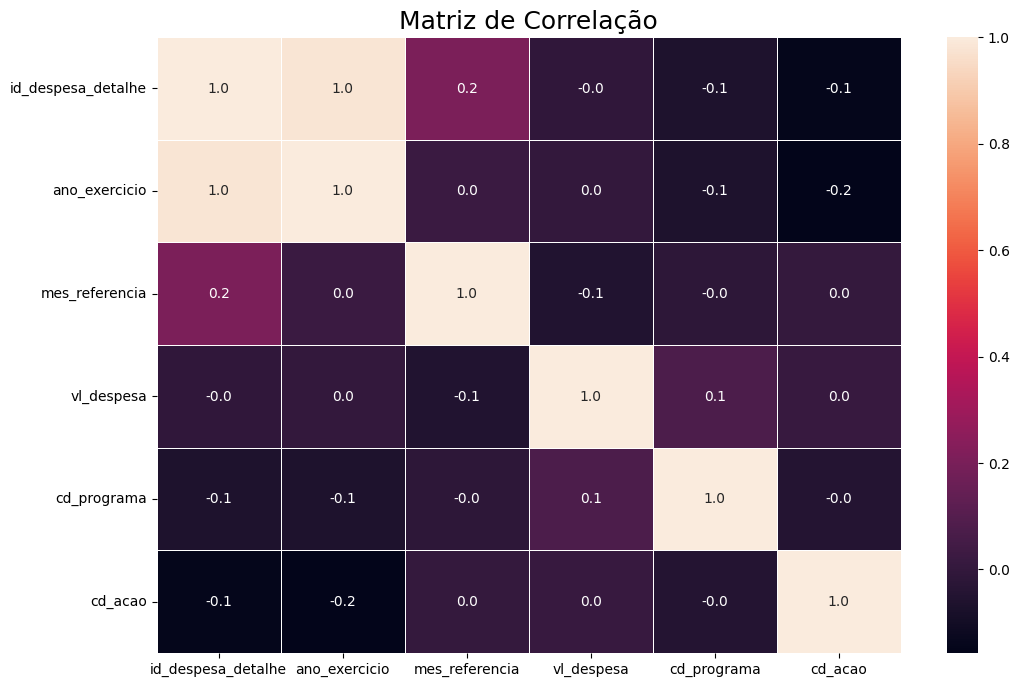

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plt.title('Matriz de Correlação', size=18)

<h3> Perguntas e Possíveis Análises Futuras </h3>
- Faz sentido mantermos todos as ações `(ds_acao)` no estudo? Como manutenção da unidade, manutenção das despesas administrativas? <br>
- Por que no valor mínimo de despesas temos valores negativos? Talvez alguma restituição de valores?<br>
- Será que possuímos um dicionário de dados?<br>
- Gasto de acordo com a população? É possível criar uma média de gasto com o total de estudantes? Com quais dados?